### minDALL-E 소스코드 다운로드

In [ ]:
!git clone https://github.com/scpark20/minDALL-E.git

### 필요한 라이브러리 설치

In [ ]:
import os
os.chdir('minDALL-E')

In [ ]:
!pip install -r requirements.txt

### minDALLE-E 모델 다운로드

In [1]:
from matplotlib import pyplot as plt
from dalle.models import Dalle
from dalle.utils.utils import set_seed

device = 'cuda:0'
set_seed(0)

model = Dalle.from_pretrained('minDALL-E/1.3B')  # This will automatically download the pretrained model.
model.to(device=device)
print('done')

/home/gaudio/.cache/minDALL-E/1.3B/tokenizer successfully restored..
/home/gaudio/.cache/minDALL-E/1.3B/stage1_last.ckpt successfully restored..
/home/gaudio/.cache/minDALL-E/1.3B/stage2_last.ckpt succesfully restored..
done


### Demo

100%|█████████████████████████████████████████| 256/256 [00:07<00:00, 33.26it/s]


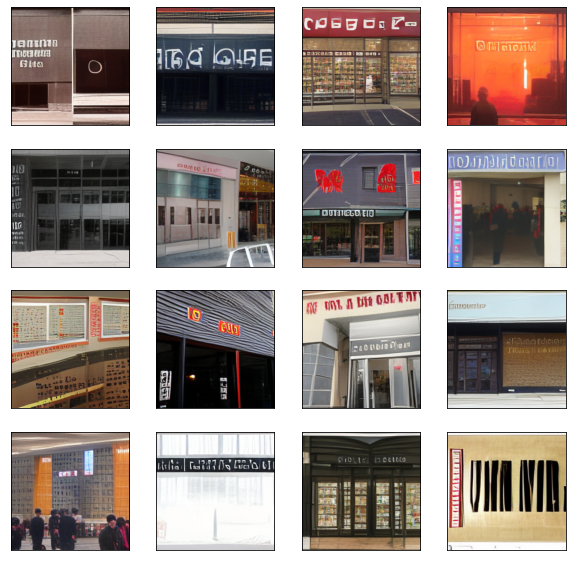

In [11]:
import numpy as np
import torch
prompt = "a store front that has the word ‘openai’ written on it. . . ."
images = model.sampling(prompt=prompt,
                        top_k=128, # It is recommended that top_k is set lower than 256.
                        top_p=None,
                        softmax_temperature=1.0,
                        num_candidates=16,
                        device=device).cpu().numpy()
images = np.transpose(images, (0, 2, 3, 1))

import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.imshow(images[i*4+j])
        plt.xticks([])
        plt.yticks([])
plt.show()